<a href="https://colab.research.google.com/github/bugeki/ML_and_DL_Projects/blob/main/SP500_oil_gold_bitcoin_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Long short-term memory (LSTM) is a deep learning architecture based on an artificial recurrent neural network (RNN). LSTMs are a viable answer for problems involving sequences and time series.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL/RNN/SP500 oil gold bitcoin.csv",index_col='Date', parse_dates = True)

In [ ]:
df.head()

,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
Date,,,,,
2010-07-18,0.100,75.370,76.010,1188.000,1064.880
2010-07-19,0.100,75.620,76.540,1181.700,1071.250
2010-07-20,0.100,76.220,77.440,1191.500,1083.480
2010-07-21,0.100,75.370,76.560,1191.600,1069.590
2010-07-22,0.100,77.820,79.300,1195.500,1093.670


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4354 entries, 2010-07-18 to 2022-06-18
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BITCOIN        4354 non-null   float64
 1   Brent Oil      4354 non-null   float64
 2   Crude Oil WTI  4354 non-null   float64
 3   Gold           4354 non-null   float64
 4   S&P500         4354 non-null   float64
dtypes: float64(5)
memory usage: 204.1 KB


In [ ]:
df.isnull().sum()

BITCOIN          0
Brent Oil        0
Crude Oil WTI    0
Gold             0
S&P500           0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BITCOIN,4354.000,8101.018,14611.248,0.100,118.500,655.500,8561.625,67527.900
Brent Oil,4354.000,77.202,26.611,19.330,55.160,71.535,106.890,127.980
Crude Oil WTI,4354.000,68.979,22.908,26.210,50.832,58.000,92.720,122.110
Gold,4354.000,1458.146,244.512,1049.700,1266.400,1358.750,1672.150,2054.600
S&P500,4354.000,2390.808,942.248,1047.220,1652.327,2125.810,2887.453,4796.560


In [ ]:
def boxplotit(data,x=3,y=3,drops=[]):
    index = 0
    plt.figure(figsize=(x*6, y*4))
    for feature in df.drop(drops,axis=1).columns:
        index += 1
        plt.subplot(x,y,index)
        sns.boxplot(x=feature, data=df, whis=1.5)

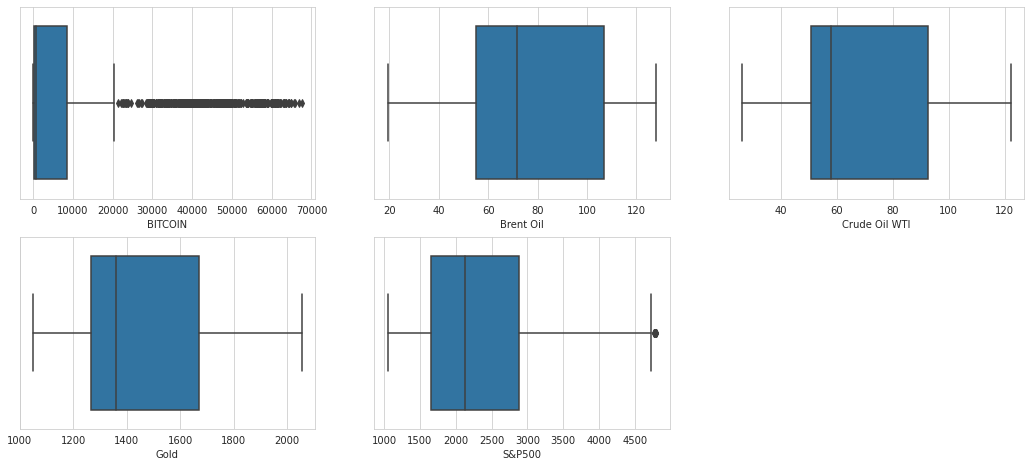

In [ ]:
boxplotit(df)

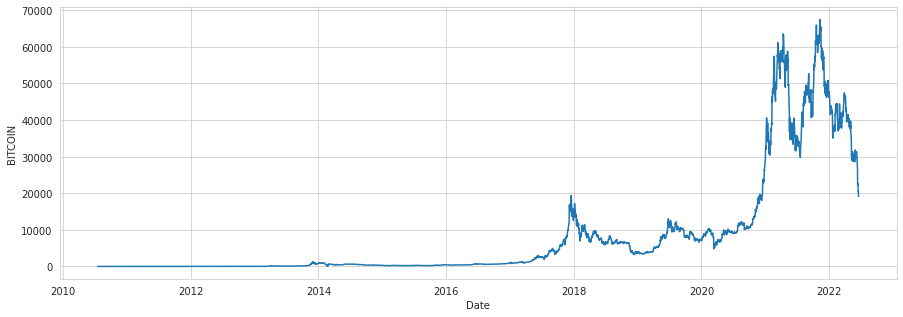

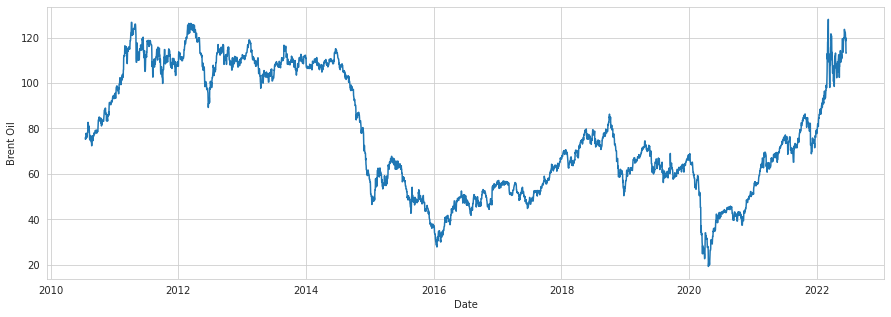

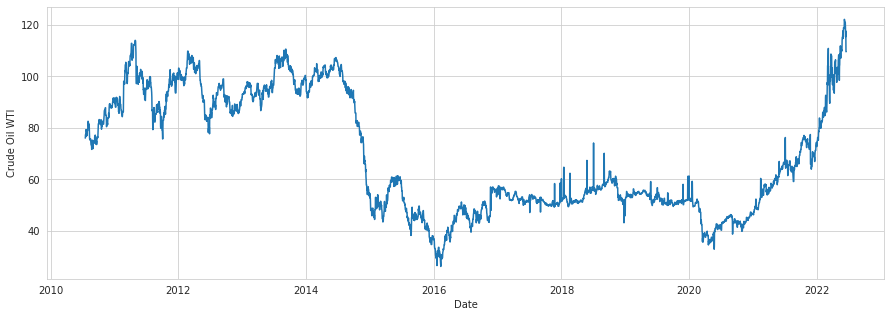

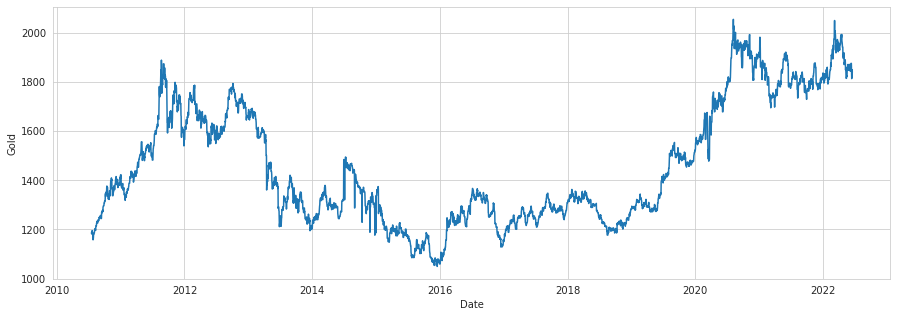

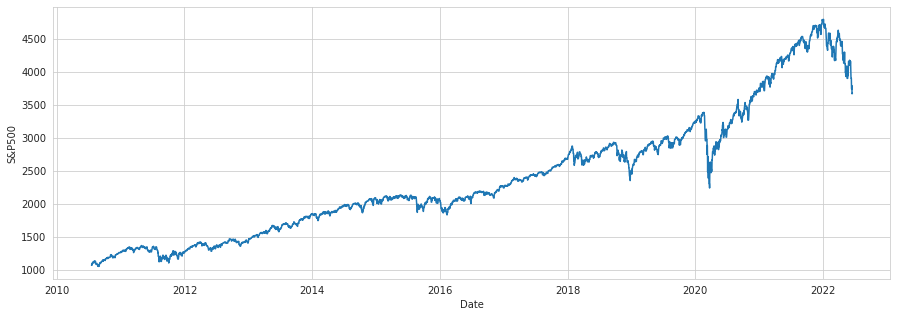

In [ ]:
columns=df.columns
for i in columns:
  plt.figure(figsize=(15,5))

  sns.lineplot(df.index, i, data=df);

In [ ]:
df.index.month

Int64Index([7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name='Date', length=4354)

In [ ]:
month_cnt.values

array([2430.08094086, 2445.74616519, 2419.92510753, 2459.92216667,
       2457.95026882, 2425.5687931 , 2346.31588732, 2297.98255376,
       2308.73547222, 2320.20532258, 2377.254     , 2404.23852151])

In [ ]:
df.columns

Index(['BITCOIN', 'Brent Oil', 'Crude Oil WTI', 'Gold', 'S&P500'], dtype='object')

In [ ]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek

df["date"] = df.index.date

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


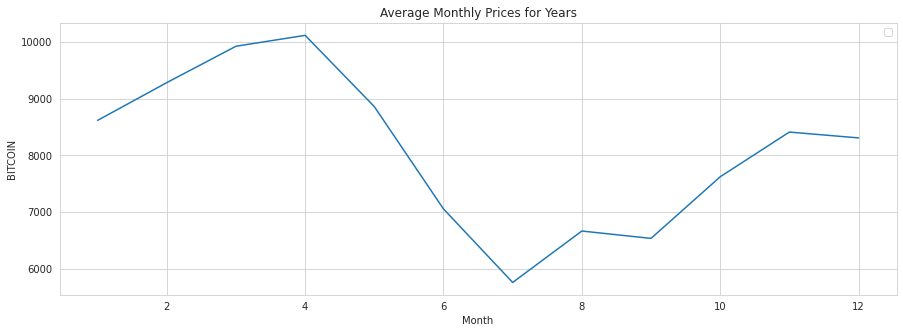

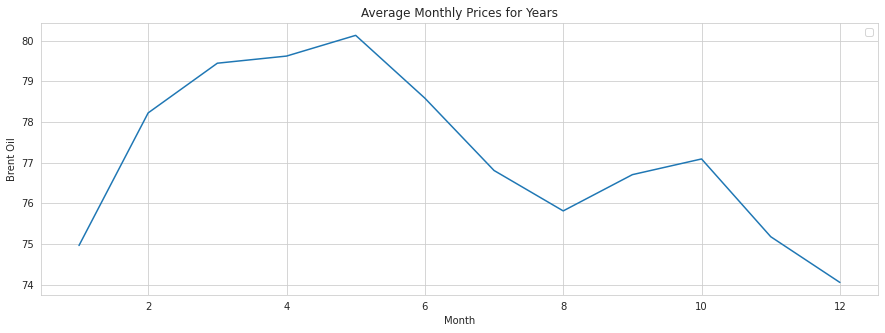

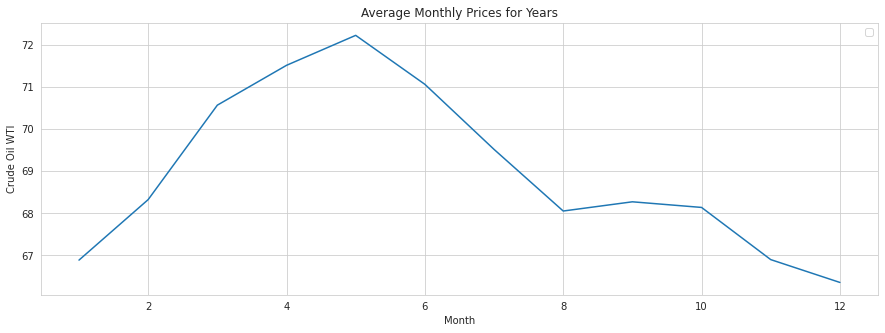

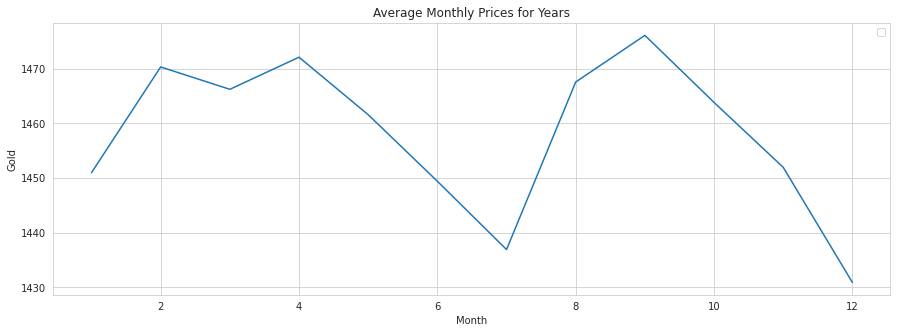

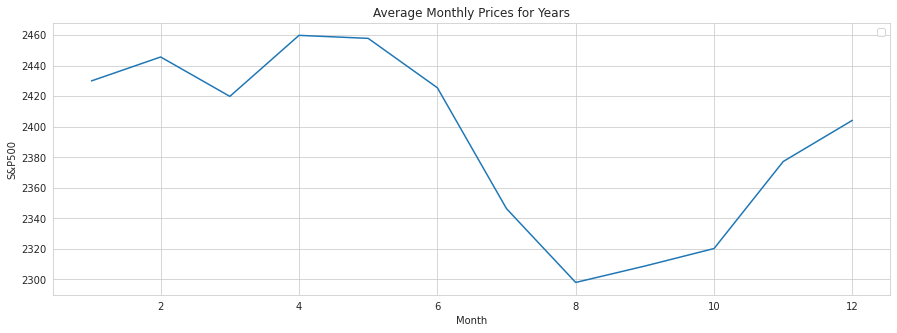

In [ ]:
columns=['BITCOIN', 'Brent Oil', 'Crude Oil WTI', 'Gold', 'S&P500']
for i in columns:
  month_cnt = df.groupby("month")[i].mean()  
  plt.figure(figsize=(15,5))
  sns.lineplot(month_cnt.index, month_cnt.values)
  plt.legend()
  plt.xlabel('Month')
  plt.ylabel(i)
  plt.title('Average Monthly Prices for Years');

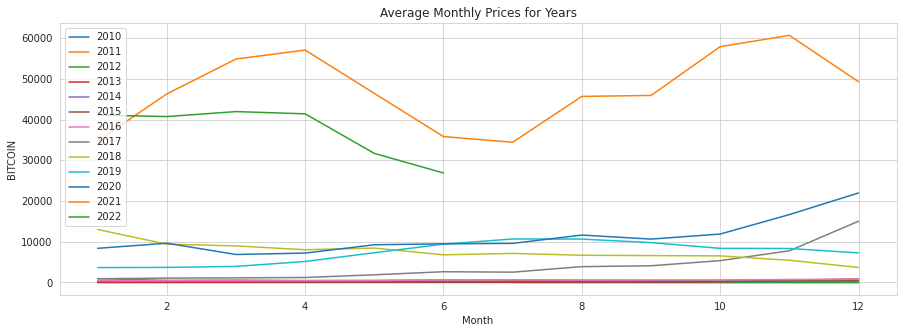

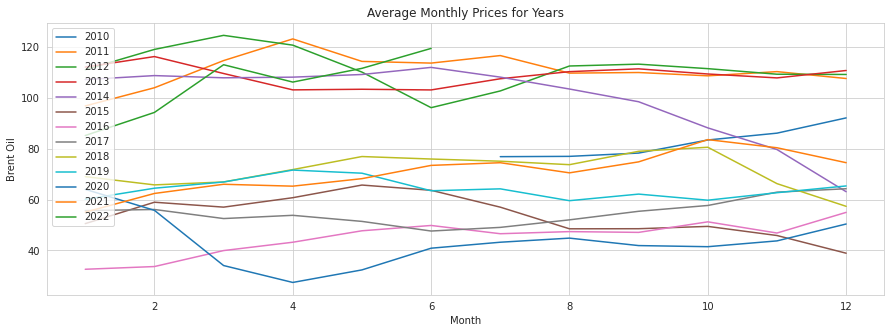

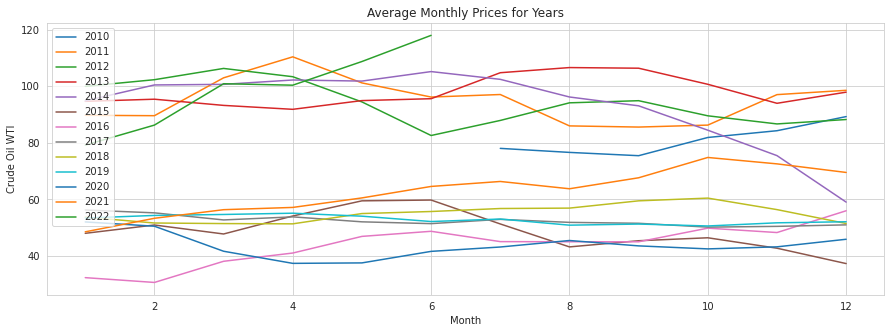

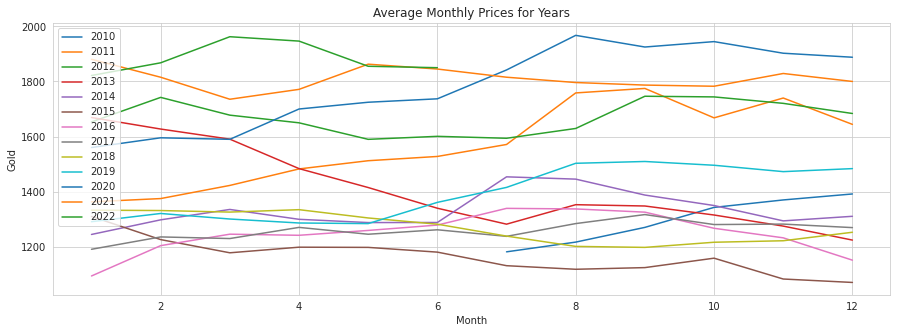

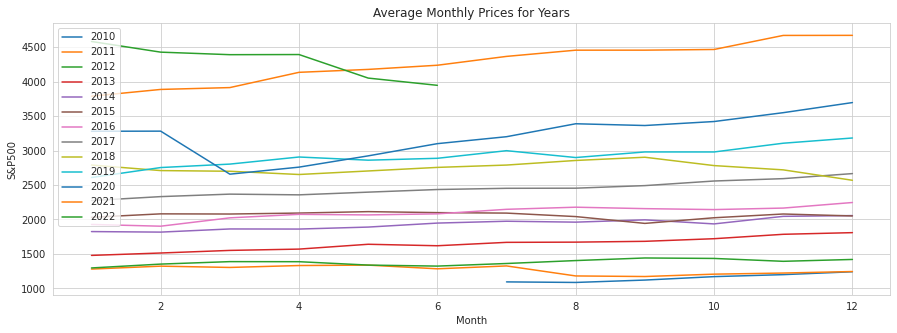

In [ ]:
columns=['BITCOIN', 'Brent Oil', 'Crude Oil WTI', 'Gold', 'S&P500']
for i in columns:
  year_month_cnt = df.groupby(["year", "month"])[i].mean()

  plt.figure(figsize=(15,5))
  for year in year_month_cnt.index.levels[0]:
      plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

  plt.legend(loc='upper left')
  plt.xlabel('Month')
  plt.ylabel(i)
  plt.title('Average Monthly Prices for Years')
  plt.show()

No handles with labels found to put in legend.


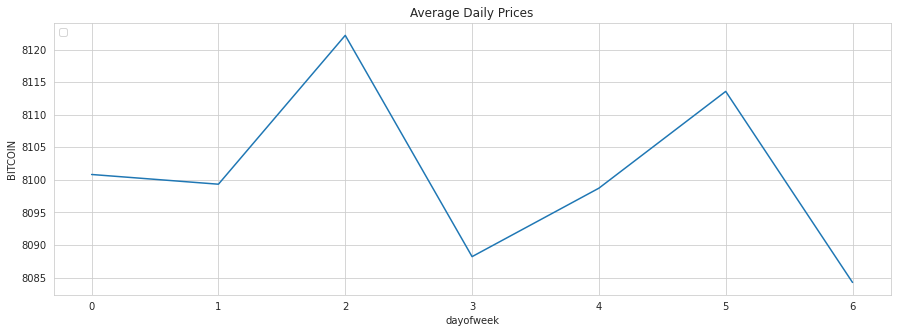

No handles with labels found to put in legend.


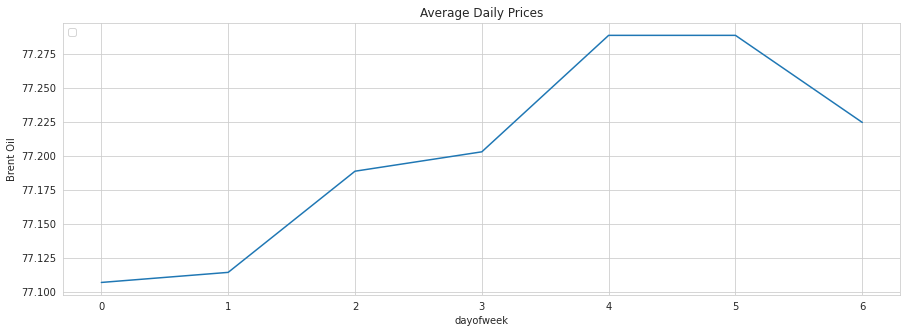

No handles with labels found to put in legend.


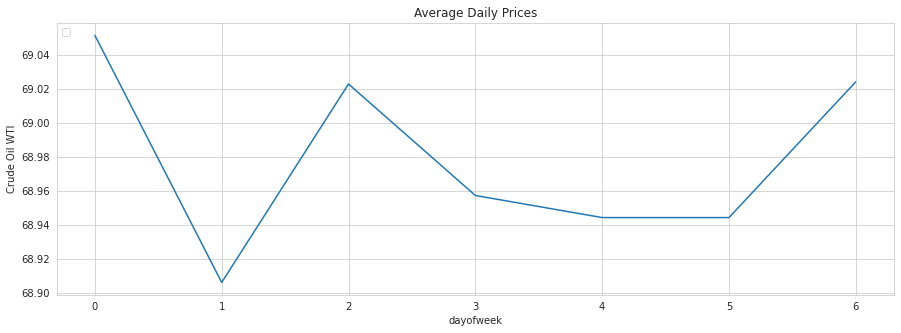

No handles with labels found to put in legend.


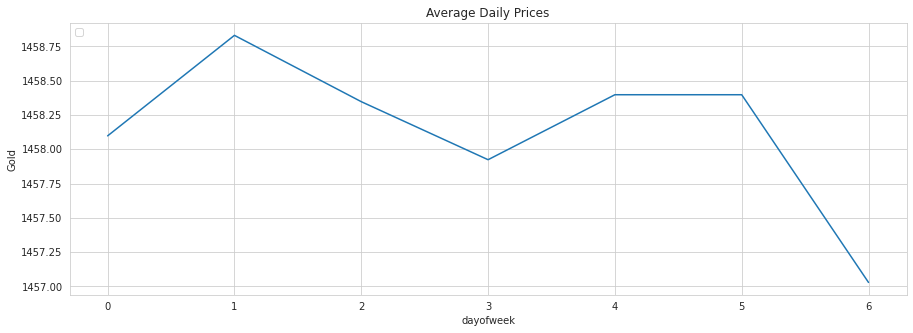

No handles with labels found to put in legend.


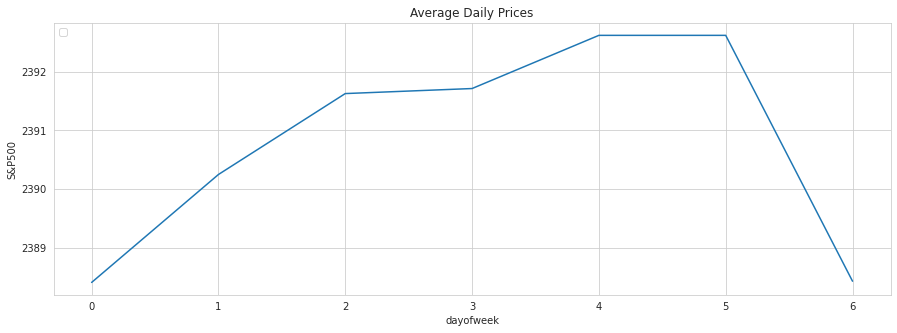

In [ ]:
columns=['BITCOIN', 'Brent Oil', 'Crude Oil WTI', 'Gold', 'S&P500']
for i in columns:
  weekday_cnt = df.groupby("dayofweek")[i].mean()
  plt.figure(figsize=(15,5))
  sns.lineplot(weekday_cnt.index, weekday_cnt.values)
  plt.legend(loc='upper left')
  
  plt.ylabel(i)
  plt.title('Average Daily Prices')
  plt.show()

In [ ]:
df.columns

Index(['BITCOIN', 'Brent Oil', 'Crude Oil WTI', 'Gold', 'S&P500', 'year',
       'month', 'day', 'dayofweek', 'date'],
      dtype='object')

In [ ]:
df_date=df

In [ ]:
df = df.drop(['year','month', 'day', 'dayofweek', 'date'], axis=1) 

In [ ]:
df.columns

Index(['BITCOIN', 'Brent Oil', 'Crude Oil WTI', 'Gold', 'S&P500'], dtype='object')

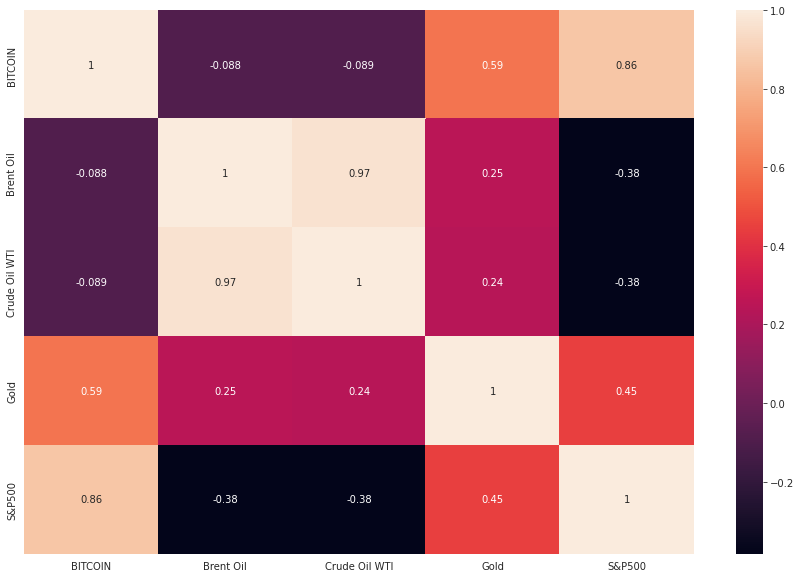

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

Data Pre-Processing

### Train - Test Split


In [ ]:
df.shape

(4354, 5)

In [ ]:
train_size = int(len(df) * 0.9)  
test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

3918 436


### Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler   

In [ ]:
f_columns = ['Brent Oil', 'Crude Oil WTI', 'Gold', 'S&P500']        
f_transformer = RobustScaler()
target_transformer = RobustScaler()

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
train['BITCOIN'] = target_transformer.fit_transform(train[['BITCOIN']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
test['BITCOIN'] = target_transformer.transform(test[['BITCOIN']])

### Define a Function for Creating Time Steps 



In [ ]:
def create_dataset(X, y, time_steps=1):               

    Xs, ys = [], []
    for i in range(len(X) - time_steps):            
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 24            #### need to adjust              

X_train, y_train = create_dataset(train, train.BITCOIN, time_steps)
X_test, y_test = create_dataset(test, test.BITCOIN, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3894, 24, 5) (3894,)
(412, 24, 5) (412,)


## Model Building with LSTM


### Create, Compile and Fit Bidirectional LSTM Model



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train.shape

(3894, 24, 5)

In [ ]:
n_features = X_train.shape[2]

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [ ]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          shuffle=True,
          callbacks=[early_stop])

Epoch 1/30
86/86 [==============================] - 4s 41ms/step - loss: 0.0016 - val_loss: 0.2347
Epoch 2/30
86/86 [==============================] - 4s 41ms/step - loss: 0.0012 - val_loss: 0.3641
Epoch 3/30
86/86 [==============================] - 4s 41ms/step - loss: 9.9699e-04 - val_loss: 0.4457
Epoch 4/30
86/86 [==============================] - 3s 41ms/step - loss: 9.2056e-04 - val_loss: 0.3437
Epoch 5/30
86/86 [==============================] - 3s 41ms/step - loss: 0.0011 - val_loss: 0.3691
Epoch 6/30
86/86 [==============================] - 3s 40ms/step - loss: 9.4930e-04 - val_loss: 0.3593
Epoch 7/30
86/86 [==============================] - 4s 41ms/step - loss: 0.0014 - val_loss: 0.5912
Epoch 8/30
86/86 [==============================] - 3s 41ms/step - loss: 9.9171e-04 - val_loss: 0.4311
Epoch 9/30
86/86 [==============================] - 4s 41ms/step - loss: 8.0878e-04 - val_loss: 0.3089
Epoch 10/30
86/86 [==============================] - 3s 40ms/step - loss: 7.2518e-04 - va

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (None, 256)              137216    
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 137,473
Trainable params: 137,473
Non-trainable params: 0
_________________________________________________________________


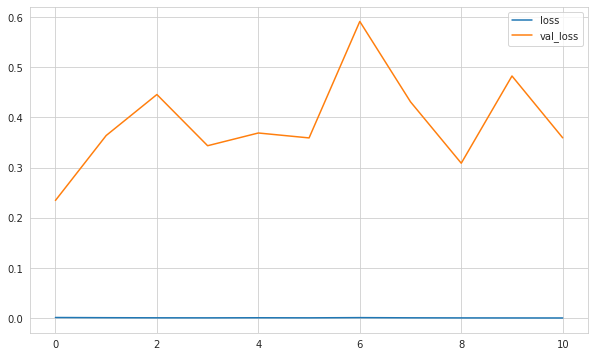

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be used for next prediction¶

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

r2_score: -0.6604579532084098 
mae: 1.3759426002262172 
mse: 2.182744695166817 
rmse: 1.4774114847146738


### Inverse Transformation and Compare

In [ ]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))          ### to return real values
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [ ]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index

In [ ]:
pred_test

,test,prediction
Date,,
2021-05-03,8.765,5.924
2021-05-04,8.234,5.952
2021-05-05,8.807,5.932
2021-05-06,8.647,5.950
2021-05-07,8.791,5.941
...,...,...
2022-06-14,3.344,3.176
2022-06-15,3.409,2.997
2022-06-16,3.069,2.847


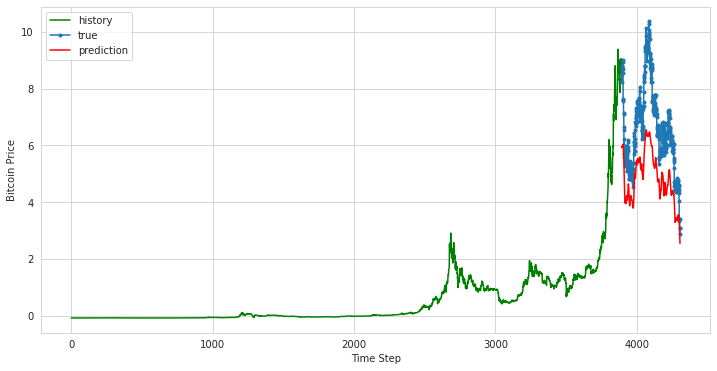

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bitcoin Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

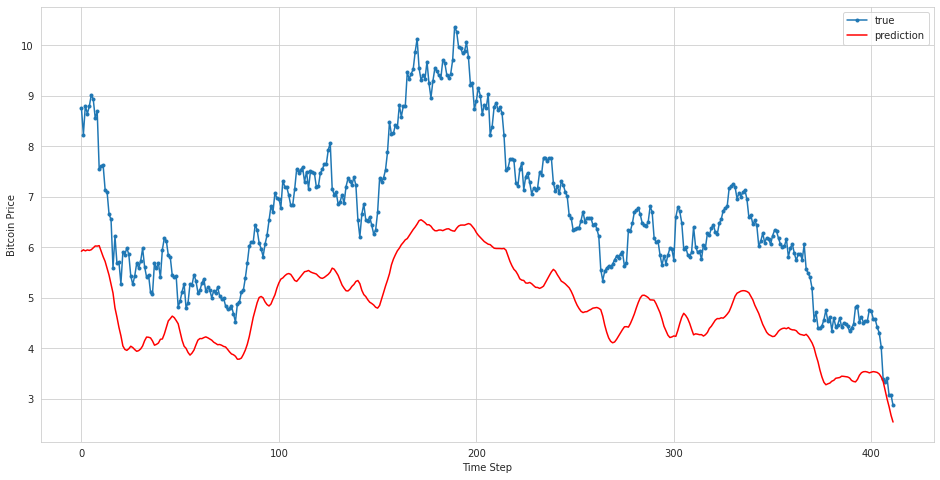

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bitcoin Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

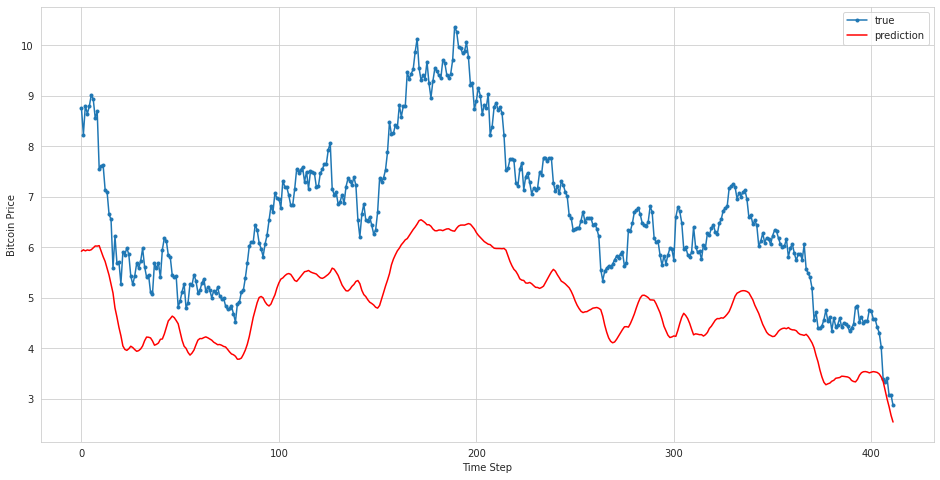

In [ ]:
plt.figure(figsize=(16,8))                     ### sonuçlar iyi sebebi: 24 veriye 1 predict veriyor, seasonity ve featureların anlamlı olması
plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")
plt.ylabel('Bitcoin Price')
plt.xlabel('Time Step')
plt.legend()
plt.show();

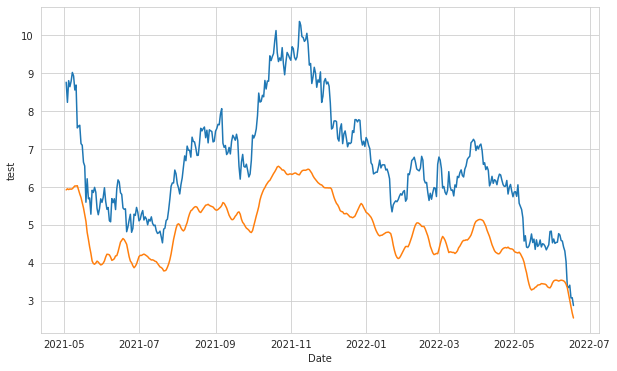

In [ ]:
data_by_day = pred_test.resample('1D').mean()
sns.lineplot(x=data_by_day.index, y='test', data=data_by_day)
sns.lineplot(x=data_by_day.index, y='prediction', data=data_by_day)
plt.show()

##Retrain and Forecasting

### Scale full data

Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

In [ ]:
val_size = 24                                           ### train ile aynı size olması daha sağlıklı
val = df.iloc[-val_size:]                           ### val için son 24 ü kullandık
full = df.iloc[:-val_size]
print(len(full), len(val))

4330 24


In [ ]:
f_columns = ['Brent Oil', 'Crude Oil WTI', 'Gold', 'S&P500']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns].to_numpy())
full['BITCOIN'] = target_transformer.fit_transform(full[['BITCOIN']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns])
val['BITCOIN'] = target_transformer.transform(val[['BITCOIN']])

In [ ]:
full

,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
Date,,,,,
2010-07-18,-0.079,0.081,0.433,-0.420,-0.856
2010-07-19,-0.079,0.085,0.446,-0.436,-0.851
2010-07-20,-0.079,0.097,0.467,-0.412,-0.841
2010-07-21,-0.079,0.081,0.446,-0.411,-0.852
2010-07-22,-0.079,0.128,0.512,-0.402,-0.833
...,...,...,...,...,...
2022-05-21,3.471,0.801,1.254,1.220,1.447
2022-05-22,3.574,0.801,1.254,1.220,1.447
2022-05-23,3.430,0.767,1.254,1.234,1.506


### reshape to [samples, time_steps, n_features]

In [ ]:
X, y = create_dataset(full, full.BITCOIN, time_steps)

print(X.shape, y.shape)

(4306, 24, 5) (4306,)


### Create Final model with full data 

In [ ]:
model = Sequential()                       ### early stop kullanırsak data ayırmamız gerekir

model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X, y, 
          epochs=20, 
          batch_size=32, 
         # shuffle=False                         ### batch size yüksekse karmak iyidir, mesela 32, tekdüze eğitim yapmıyor
         )

Epoch 1/20
135/135 [==============================] - 9s 36ms/step - loss: 0.1697
Epoch 2/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0259
Epoch 3/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0232
Epoch 4/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0157
Epoch 5/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0194
Epoch 6/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0148
Epoch 7/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0135
Epoch 8/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0119
Epoch 9/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0113
Epoch 10/20
135/135 [==============================] - 5s 37ms/step - loss: 0.0112
Epoch 11/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0096
Epoch 12/20
135/135 [==============================] - 5s 36ms/step - loss: 0.0095
Epoch 13/20
1

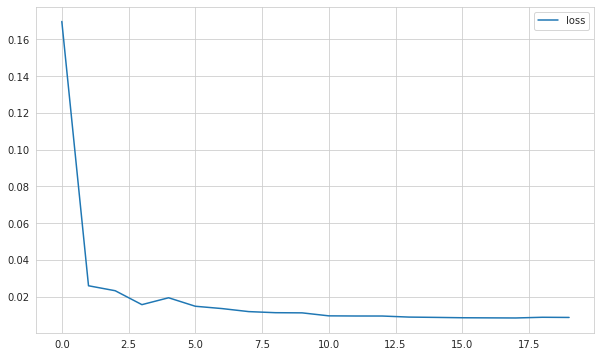

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### forecasting

In [ ]:
df_fake = val.iloc[:,1:]
df_fake

,Brent Oil,Crude Oil WTI,Gold,S&P500
Date,,,,
2022-05-26,0.832,1.345,1.234,1.574
2022-05-27,0.934,1.369,1.242,1.656
2022-05-28,0.934,1.369,1.242,1.656
2022-05-29,0.934,1.382,1.218,1.656
2022-05-30,0.899,1.430,1.237,1.656
2022-05-31,0.860,1.359,1.220,1.635
2022-06-01,0.820,1.373,1.221,1.610
2022-06-02,0.899,1.412,1.277,1.671
2022-06-03,0.940,1.460,1.224,1.616


In [ ]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([3.44361192, 3.37097061, 3.42233693, 3.47517465, 3.74751626,
       3.75597078, 3.51537281, 3.5946113 , 3.50360161, 3.52330872,
       3.52918226, 3.70461652, 3.67581568, 3.5639893 , 3.55147034,
       3.42911502, 3.34711464, 3.13037264, 2.62885451, 2.59379419,
       2.6445213 , 2.38023621, 2.38723139, 2.22721064])

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))                    ### 1 e 11 lik 24 data gelecek 

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])                                ### predict ettiğmiz yerine reel değerleri koyuyoruz
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [ ]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.7498225410177835 
mae: 0.20109511311256922 
mse: 0.056337666842113034 
rmse: 0.2373555704889039


In [ ]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[3.360092 , 3.307305 , 3.2411513, 3.2331991, 3.2598639, 3.4245987,
        3.4759417, 3.2926672, 3.2864506, 3.237558 , 3.239736 , 3.2512753,
        3.3720036, 3.3889031, 3.2953403, 3.2574186, 3.164536 , 3.087295 ,
        2.9226716, 2.56724  , 2.4557748, 2.473773 , 2.3264182, 2.281209 ]],
      dtype=float32)

In [ ]:
df.tail()

,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
Date,,,,,
2022-06-14,2.594,0.968,1.461,1.133,1.313
2022-06-15,2.645,0.916,1.375,1.148,1.357
2022-06-16,2.380,0.942,1.429,1.224,1.257
2022-06-17,2.387,0.812,1.237,1.201,1.263
2022-06-18,2.227,0.812,1.237,1.201,1.263


In [ ]:
forecast_index = pd.date_range(start = '2022-06-19', periods = periods, freq = 'D')

In [ ]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

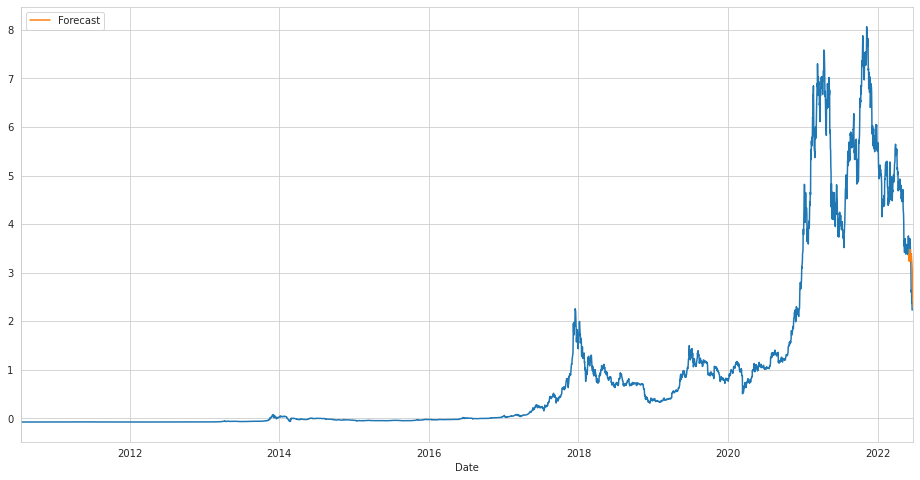

In [ ]:
ax = df["BITCOIN"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(19113.0, 19196.0)

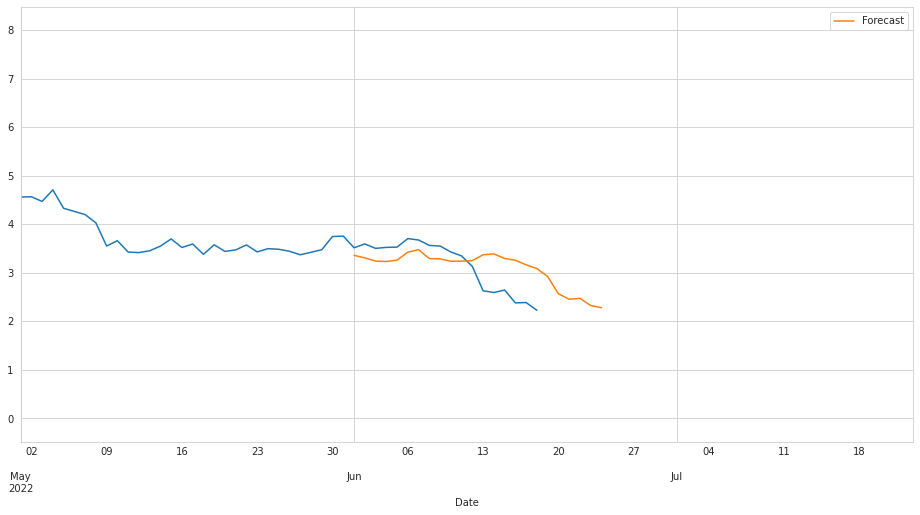

In [ ]:
ax = df["BITCOIN"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2022-05-01', '2022-07-23')